# APMTH 207: Advanced Scientific Computing: 
## Stochastic Methods for Data Analysis, Inference and Optimization
## Homework 9
**Harvard University**<br>
**Spring 2018**<br>
**Instructors: Rahul Dave**<br>
**Due Date: ** Saturday, April 7th, 2018 at 10:59am

**Instructions:**

- Upload your final answers as an iPython notebook containing all work to Canvas.

- Structure your notebook and your work to maximize readability.

This Homework is a continuation of Problem #1 from Homework 8.

Your answers to Problem #1 from HW8 should  give you a idea of how one might create or select a model for a particular application and your answers will help you with formalizing the model in this Homework, which is much more technically involved.


## Problem #1: Modeling Your Understanding

In the dataset "reviews_processed.csv", you'll find a database of Yelp reviews for a number of restaurants. These reviews have already been processed and transformed by someone who has completed the (pre) modeling process described in Problem #1. That is, imagine the dataset in "reviews_processed.csv" is the result of feeding the raw Yelp reviews through the pipeline someone built for Problem #1.

The following is a full list of columns in the dataset and their meanings:

I. Relevant to Part A and B:

  1. "review_id" - the unique identifier for each Yelp review
  2. "topic" - the subject addressed by the review (0 stands for food and 1 stands for service)
  3. "rid" - the unique identifier for each restaurant
  4. "count" - the number of sentences in a particular review on a particular topic
  5. "mean" - the probability of a sentence in a particular review on a particular topic being positive, averaged over total number of sentences in the review related to that topic.
  6. "var" - the variance of the probability of a sentence in a particular review on a particular topic being positive, taken over all sentences in the review related to that topic.

II. Relevant (possibly) to Extra Credit:

  1. "uavg" - the average star rating given by a particular reviewer (taken across all their reviews)
  2. "stars" - the number of stars given in a particular review
  3. "max" - the max probability of a sentence in a particular review on a particular topic being positive
  4. "min" - the min probability of a sentence in a particular review on a particular topic being positive

The following schema illustrates the model of the raw data that is used to generate "reviews_processed.csv":
<img src="restuarant_model.pdf">

***Warning:*** *this is a "real" data science problem in the sense that the dataset in "reviews_processed.csv" is large. We understand that a number of you have limited computing resources, so you are encouraged but not required to use the entire dataset. If you wish you may use 10 restaurants from the dataset, as long as your choice of 10 contains a couple of restaurants with a large number of reviews and a couple with a small number of reviews.*

### Part A: Modeling

When the value in "count" is low, the "mean" value can be very skewed.

Following the [SAT prep school example discussed in lab](https://am207.github.io/2018spring/wiki/gelmanschoolstheory.html) (and using your answers for HW 8 Problem #1), set up a Bayesian model(that is, write functions encapsulating the pymc3 code) for a reviewer $j$'s opinion of restaurant $k$'s food and service, separately. That is, you will have a model for each restaurant and each aspect (food and serivce). For restaurant $k$, you will have a model for $\{\theta_{jk}^{\text{food}}\}$ and one for $\{\theta_{jk}^{\text{service}}\}$, where $\theta_{jk}$ is the positivity of the opinion of the $j$-th reviewer regarding the $k$-th restaurant. 

**Hint:** what quantity in our data naturally corresponds to $\bar{y}_j$'s in the prep school example? How would you calculate the parameter $\sigma_j^2$ in the distribution of $\bar{y}_j$ (note that, contrary to the school example, $\sigma_j^2$ is not provided explictly in the restaurant data)?

### Part B: Analysis for Each restaurant

Use your model to produce estimates for $\theta_{jk}$'s. Pick a few restaurants, for each aspect ("food" and "service") of each restaurant, plot your estimates for the $\theta$'s against the values in the "mean" column (corresponding to this restaurant). 

For the same restaurants, for each aspect, generate shrinkage plots and probability shrinkage plots as follows:

**Shrinkage plot for a restaurant, topic**:

The aim for this plot is to see the shrinkage from sample means (error bars generated from standard error) to $\theta_{jk}$'s (error bars generated from theta variance).  

The sample means of reviews are plotted at $y=0$ and the posterior means ($\theta_{ik}$) are plotted at $y=1$. For each review connect the sample mean to the posterior mean with a line.  Show error bars on the sample mean points using standard error and on the ($\theta_{jk}$) points using variance.

**Probability Shrinkage plot for a restaurant, topic**:

The aim for this plot is to see the shrinkage from the classification probabilities from the sample means of reviews to the classification probabilities of $\theta_{jk}$'s.  The classification probabilities are calculated from the gaussian at the given mean and variance. The sample means and standard error are fed into the gaussian to generate one set of classification probabilities.  The $\theta_{jk}$ estimates and variances are fed into the gaussian to generate the other set of variances.

The y values are the classification probability (calculated as 1-cdf) using the normal distribution at a given mean and variance.

The sample means of reviews are plotted with $y$'s obtained by using the sample means as the means in the normal above, with line segments (error bars) representing the standard error. 

The posterior means ($\theta_{jk}$) are plotted with $y$'s obtained using the posterior means (thetas) in the gaussian above, and variances on the thetas with line segments (error bars) representing the variances on the $\theta_{jk}$'s.

We've provided you some code to generate a shrinkage plot and a probability shrinkage plot is included in this notebook, but feel free to implement your own. The code should also help elucidate the text above.

Use these plots to discuss the statistical benefits of modeling each reviewer's opinion using your model from Part A, rather than approximating the reviewer opinion with the value in "mean".

Example of a shrinkage plot:
<img src="shrinkage.png">

Example of a probability shrinkage plot:
<img src="shrinkage_prob.png">

### Part C: Analysis Across Restaurants

Aggregate, in a simple but reasonable way, the reviewer's opinions given a pair of overall scores for each restaurant -- one for food and one for service. Rank the restaurants by food score and then by service score. Discuss the statistical weakness of ranking by these scores.

(**Hint:** what is statistically problematic about the way you aggregated the reviews of each restaurant to produce an overall food or service score? You've seen this question addressed a number of times in previous homeworks. This is also the same problem with summarizing a reviewer's opinion on a restaurants service and food based on what they write.)

### Extra Credit:

1. Propose a model addressing the weakness of your approach in Part C for the overall quality of food and service for each restaurant given the $\theta$'s. Combine your model for the overall quality with your model for the $\theta$'s. 
2. Implement and use this combined model to estimate the overall quality of food and service for each restaurant.

(Its perfectly ok to just propose and not implement, you'll just get less credit. But please atleast try part 1!)



#### Part A

On a per restaurant basis, we basically have the gelman schools problem with each review treated as a school. This means our $\hat{y_j}$ is the value in the mean column and the $\sigma_j$ is the square root of the population variance column divided by the number of counts.

This means that for each restaurant (k) there are J 'reviews' and within each there is a food review and a service review.

Therefore, for the food review model and the service model we can build a pymc3 framework using the following:

$$ \mu \sim Half-Cauchy(0,0.2) $$

$$ \tau \sim Half-Cauchy(0,0.2) $$

$$ \nu_j \sim \mathcal{N}(0,1) $$

$$ \theta_j = \mu + \tau \nu_j $$

$$ \hat{y_j}|\theta_j \sim \mathcal{N}(\theta_j,\sigma_j^2) $$

You might ask why we use sharply peaked distributions - this is because the y hats are probabiity values between 0 and 1 so this makes the most sense.

#### Part B

In [1]:
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")
import pymc3 as pm

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
C:\Users\Shaan Desai\Anaconda3\envs\am207\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
df = pd.read_csv('reviews_processed.csv')

In [3]:
df

,review_id,topic,rid,count,max,mean,min,stars,uavg,var
0,---sV8KdwfBoDw38KW_WnQ,0,VgLiSW1iGkpzIEXOgvUBEw,5,0.689383,0.558430,0.312919,3,3.285714,0.024112
1,---sV8KdwfBoDw38KW_WnQ,1,VgLiSW1iGkpzIEXOgvUBEw,5,0.816901,0.554300,0.211441,3,3.285714,0.050309
2,--0MzHNy7MVBRvZCOAeRPg,0,4gLecengX1JeGILm7DwU3w,3,0.746711,0.574416,0.360240,5,3.829268,0.038655
3,--0MzHNy7MVBRvZCOAeRPg,1,4gLecengX1JeGILm7DwU3w,6,0.848065,0.657755,0.476156,5,3.829268,0.014583
4,--2NT40xmHh9oBLumzdjhA,0,4ZZab5hinFzHtj3sE8vQWg,5,0.764218,0.601008,0.337710,2,4.181818,0.026742
5,--2NT40xmHh9oBLumzdjhA,1,4ZZab5hinFzHtj3sE8vQWg,4,0.630715,0.467825,0.386750,2,4.181818,0.012157
6,--2Ylq1M_Toj6e0hy_C2XA,0,e9er1p-8RMyRa9IKUzKE-w,4,0.743135,0.613059,0.539191,4,3.500000,0.008469
7,--2Ylq1M_Toj6e0hy_C2XA,1,e9er1p-8RMyRa9IKUzKE-w,1,0.593916,0.593916,0.593916,4,3.500000,0.000000
8,--3QRshg8GhfimzyGWkcAQ,0,T2zItRCqolfzSZR2Io0OZg,2,0.758943,0.756603,0.754264,5,3.250000,0.000011
9,--3QRshg8GhfimzyGWkcAQ,1,T2zItRCqolfzSZR2Io0OZg,1,0.888077,0.888077,0.888077,5,3.250000,0.000000


In [26]:
#building model
#VgLiSW1iGkpzIEXOgvUBEw
#restaurants i want to look at
rest_ids = ['z8DlBX3FNJUgCVFHN2BPnQ','VgLiSW1iGkpzIEXOgvUBEw','OiCxoAIoBvEWxf7p1qVVmA','ZQPnmwLikPeGD0_1CVqd6A','slndywABScVDVUZYBS56lQ','slndywABScVDVUZYBS56lQ']
num_of_restaurants = len(rest_ids)

#array to store food and service thetas per restaurant and means
collector = []
varcollector = []
ppcs = []
stars = []
staravg = []

for k in range(num_of_restaurants):
    rest = df[df['rid']==rest_ids[k]]
    rest_food = rest[rest['topic']==0]
    rest_service = rest[rest['topic']==1]
    
    #food model
    J = rest_food.shape[0]
    sigma = np.zeros(J)
    for i in range(J):
        var = rest_food['var'].values[i]
        count = rest_food['count'].values[i]
        if count == 1:
            sigma[i] = 1
        else:
            sigma[i] = np.sqrt(var/count)
    print(sigma)
    sigfood = sigma
    yfood = rest_food['mean'].values
    #this provides the general workflow per restaurant
    with pm.Model() as food:
        mu = pm.HalfCauchy('mu', beta=0.2)
        tau = pm.HalfCauchy('tau', beta=0.2)
        nu = pm.Normal('nu', mu=0., sd=1., shape=J)
        theta = pm.Deterministic('theta', mu + tau * nu)
        #theta = pm.Normal('theta',mu,tau,shape=J)
        obs = pm.Normal('obs', mu=theta, sd=sigma, observed=yfood)
        tracefood = pm.sample(5000, init=None, njobs=2, tune=1000)
        ppcfood = pm.sample_ppc(tracefood, samples=500)
    foodstar = rest_food['stars'].values
    #service model
    J = rest_service.shape[0]
    sigma = np.zeros(J)
    for i in range(J):
        var = rest_service['var'].values[i]
        count = rest_service['count'].values[i]
        if count == 1:
            sigma[i] = 1
        else:
            sigma[i] = np.sqrt(var/count)
    sigserv = sigma
    yserv = rest_service['mean'].values
    #this provides the general workflow per restaurant
    with pm.Model() as service:
        mu = pm.HalfCauchy('mu', beta=0.2)
        tau = pm.HalfCauchy('tau', beta=0.2)
        nu = pm.Normal('nu', mu=0., sd=1., shape=J)
        theta = pm.Deterministic('theta', mu + tau * nu)
        #theta = pm.Normal('theta',mu,tau,shape=J)
        obs = pm.Normal('obs', mu=theta, sd=sigma, observed=yserv)
        traceservice = pm.sample(5000, init=None, njobs=2, tune=1000)
        ppcservice = pm.sample_ppc(traceservice, samples=500)
    servicestar = rest_service['stars'].values
    
    staravg.append((rest_food['uavg'].values,rest_service['uavg'].values))
    stars.append((foodstar,servicestar))
    ppcs.append((ppcfood,ppcservice))  
    collector.append((tracefood,yfood,traceservice,yserv))
    varcollector.append((sigfood**2,rest_food['count'].values,sigserv**2,rest_service['count'].values))

[0.04656353 0.02477648 0.06433972 1.         0.0677115  0.11461646
 0.03705277 0.02358771]


C:\Users\Shaan Desai\Anaconda3\envs\am207\lib\site-packages\pymc3\model.py:384: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if not np.issubdtype(var.dtype, float):
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [nu, tau_log__, mu_log__]
There were 14 divergences after tuning. Increase `target_accept` or reparameterize.
There were 12 divergences after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 25% for some parameters.
100%|██████████████████████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 2131.61it/s]
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [nu, tau_log__, mu_log__]
There were 248 divergences after tuning. Increase `target_accept` or reparameterize.
There were 218 divergences after tuning. Increase `target_accept` or reparameterize.
The estimated numb

[0.06944385 0.11239346 0.01456313 0.06012111 1.         0.05976558
 0.10247578 0.0054529 ]


Multiprocess sampling (2 chains in 2 jobs)
NUTS: [nu, tau_log__, mu_log__]
There were 164 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.7093769956654822, but should be close to 0.8. Try to increase the number of tuning steps.
There were 300 divergences after tuning. Increase `target_accept` or reparameterize.
The estimated number of effective samples is smaller than 200 for some parameters.
100%|██████████████████████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 3895.96it/s]
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [nu, tau_log__, mu_log__]
There were 61 divergences after tuning. Increase `target_accept` or reparameterize.
There were 58 divergences after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 10% for some parameters.
100%|██████████████████████████████████████████████████████████████████████████████|

[0.03690904 0.06729944 0.04761044 0.03710276 0.08734213 0.03747658
 0.03396036 0.0662133 ]


Multiprocess sampling (2 chains in 2 jobs)
NUTS: [nu, tau_log__, mu_log__]
There were 7 divergences after tuning. Increase `target_accept` or reparameterize.
There were 5 divergences after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 10% for some parameters.
100%|██████████████████████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 4813.45it/s]
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [nu, tau_log__, mu_log__]
There were 72 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.6588746695007246, but should be close to 0.8. Try to increase the number of tuning steps.
There were 6 divergences after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 25% for some parameters.
100%|██████████████████████████████████████████████████████████████████████████████| 500/500 [00:00

[0.02402873 1.         1.         1.         1.         0.13907381
 1.         0.04986157]


Multiprocess sampling (2 chains in 2 jobs)
NUTS: [nu, tau_log__, mu_log__]
There were 244 divergences after tuning. Increase `target_accept` or reparameterize.
There were 193 divergences after tuning. Increase `target_accept` or reparameterize.
The estimated number of effective samples is smaller than 200 for some parameters.
100%|██████████████████████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 3259.09it/s]
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [nu, tau_log__, mu_log__]
There were 153 divergences after tuning. Increase `target_accept` or reparameterize.
There were 171 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.6773924490726455, but should be close to 0.8. Try to increase the number of tuning steps.
The number of effective samples is smaller than 10% for some parameters.
100%|█████████████████████████████████████████████████████████████████████████████

[0.09505441 0.04522633 0.06503442 0.04837618 0.0838733  0.02830109
 0.01911903 0.02687232]


Multiprocess sampling (2 chains in 2 jobs)
NUTS: [nu, tau_log__, mu_log__]
There were 11 divergences after tuning. Increase `target_accept` or reparameterize.
There were 5 divergences after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 25% for some parameters.
100%|██████████████████████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 5115.58it/s]
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [nu, tau_log__, mu_log__]
There were 30 divergences after tuning. Increase `target_accept` or reparameterize.
There were 6 divergences after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 10% for some parameters.
100%|██████████████████████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 4282.71it/s]


[0.09505441 0.04522633 0.06503442 0.04837618 0.0838733  0.02830109
 0.01911903 0.02687232]


Multiprocess sampling (2 chains in 2 jobs)
NUTS: [nu, tau_log__, mu_log__]
There were 5 divergences after tuning. Increase `target_accept` or reparameterize.
There were 5 divergences after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 25% for some parameters.
100%|██████████████████████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 3570.61it/s]
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [nu, tau_log__, mu_log__]
There were 5 divergences after tuning. Increase `target_accept` or reparameterize.
There were 9 divergences after tuning. Increase `target_accept` or reparameterize.
100%|██████████████████████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 3555.19it/s]


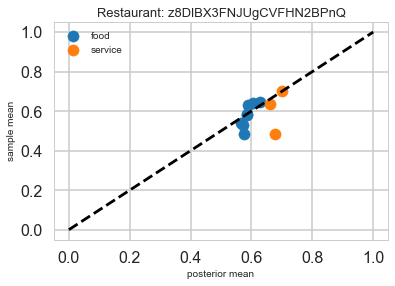

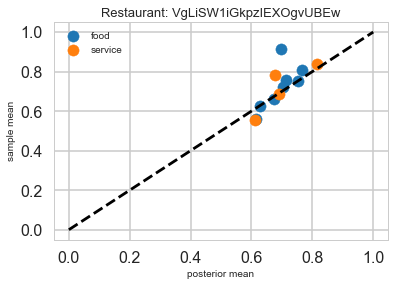

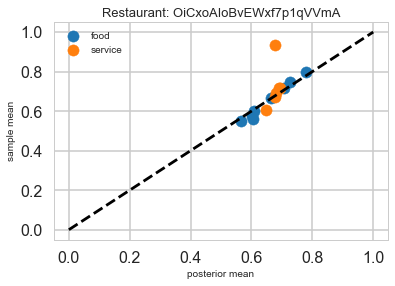

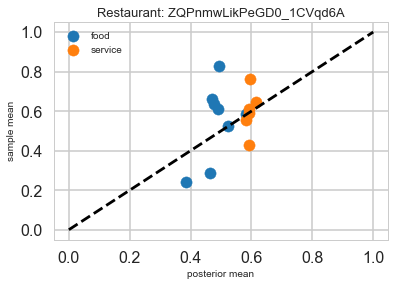

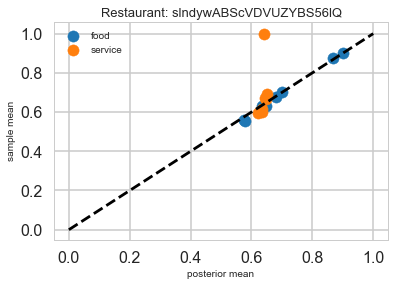

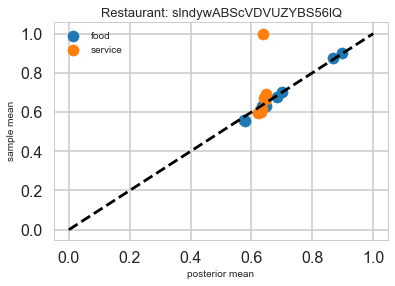

In [27]:
for i in range(len(rest_ids)):
    plt.figure()
    plt.scatter(np.mean(collector[i][0]['theta'],axis=0),collector[i][1],label='food')
    plt.scatter(np.mean(collector[i][2]['theta'],axis=0),collector[i][3],label='service')
    plt.title('Restaurant: ' + str(rest_ids[i]),fontsize=13)
    plt.plot(np.linspace(0.,1,100),np.linspace(0.,1,100),'--',c='black')
    plt.xlabel('posterior mean',fontsize=10)
    plt.ylabel('sample mean',fontsize=10)
    plt.legend(fontsize=10)

In [28]:
import scipy.special as spi

In [29]:
import itertools

# Use 1-cdf at 0.5 to model the probability of having positive sentiment
# it basically tells you the area under the gaussian after 0.5 (we'll assume 
# positive sentiment based on the usual probability > 0.5 criterion)

prob = lambda mu, vari: .5 * (1 - spi.erf((0.5- mu) / np.sqrt(2 * vari)))

# fix a restaurant and an aspect (food or service)
# "means" is the array of values in the "mean" column for the restaurant and the aspect 
#         in the dataset
# "thetas" is the array of values representing your estimate of the opinions of reviewers 
#          regarding this aspect of this particular restaurant
# "theta_vars" is the array of values of the varaiances of the thetas
# "counts" is the array of values in the "count" column for the restaurant and the aspect 
#.         in the dataset
# FEEL FREE TO RE-IMPLEMENT THESE

def shrinkage_plot(means, thetas, mean_vars, theta_vars, counts,ax):
    """
    a plot that shows how review means (plotted at y=0) shrink to
    review $theta$s, plotted at y=1
    """
    #data = zip(means, thetas, mean_vars / counts, theta_vars, counts)   
    data = zip(means, thetas, mean_vars, theta_vars, counts)   
    
    palette = itertools.cycle(sns.color_palette())
    with sns.axes_style('white'):
        for m,t, me, te, c in data: # mean, theta, mean errir, theta error, count
            color=next(palette)
            # add some jitter to y values to separate them
            noise=0.04*np.random.randn()
            noise2=0.04*np.random.randn()
            if me==0:
                me = 4
            # plot shrinkage line from mean, 0 to
            # theta, 1. Also plot error bars
            ax.plot([m,t],[noise,1+noise2],'o-', color=color, lw=1)
            ax.errorbar([m,t],[noise,1+noise2], xerr=[np.sqrt(me), np.sqrt(te)], color=color,  lw=1)
        ax.set_yticks([])
        ax.set_xlim([0,1])
        sns.despine(offset=-2, trim=True, left=True)
    #return plt.gca()

def prob_shrinkage_plot(means, thetas,mean_vars, theta_vars, counts,ax):
    """
    a plot that shows how review means (plotted at y=prob(mean)) shrink to
    review $theta$s, plotted at y=prob(theta)
    """
    #data = zip(means, thetas, mean_vars / counts, theta_vars, counts)
    data = zip(means, thetas, mean_vars, theta_vars, counts)   
    
    palette = itertools.cycle(sns.color_palette())
    with sns.axes_style('white'):
        for m,t, me, te, c in data: # mean, theta, mean errir, theta error, count
            color = next(palette)
            # add some jitter to y values to separate them
            noise = 0.001 * np.random.randn()
            noise2 = 0.001 * np.random.randn()
            if me == 0: #make mean error super large if estimated as 0 due to count=1
                me = 4
            p = prob(m, me)
            peb = prob(t, te)
            # plot shrinkage line from mean, prob-based_on-mean to
            # theta, prob-based_on-theta. Also plot error bars
            ax.plot([m, t],[p, peb],'o-', color=color, lw=1)
            ax.errorbar([m, t],[p + noise, peb + noise2], xerr=[np.sqrt(me), np.sqrt(te)], color=color, lw=1)
        #ax = plt.gca()
        ax.set_xlim([0, 1])
        ax.set_ylim([0, 1.05])
    

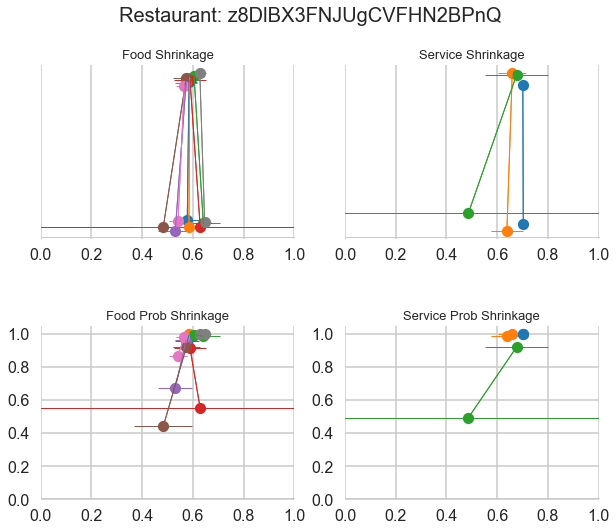

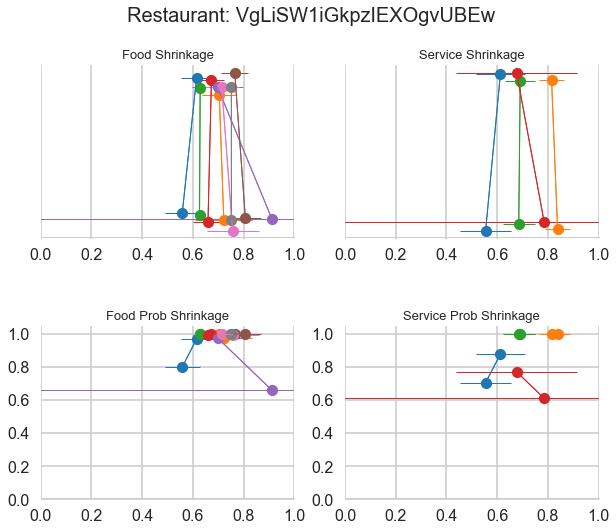

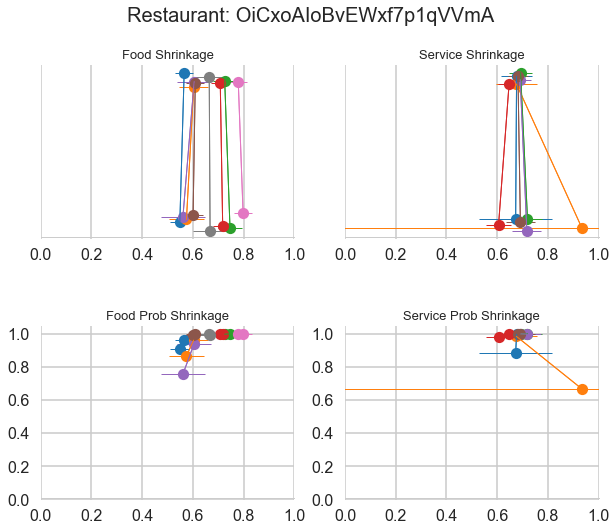

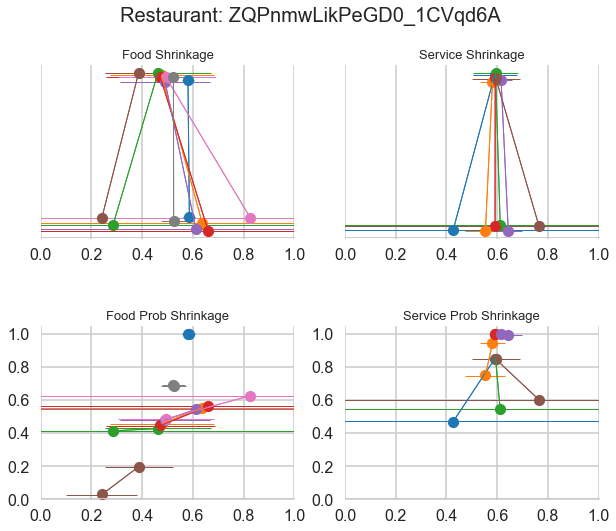

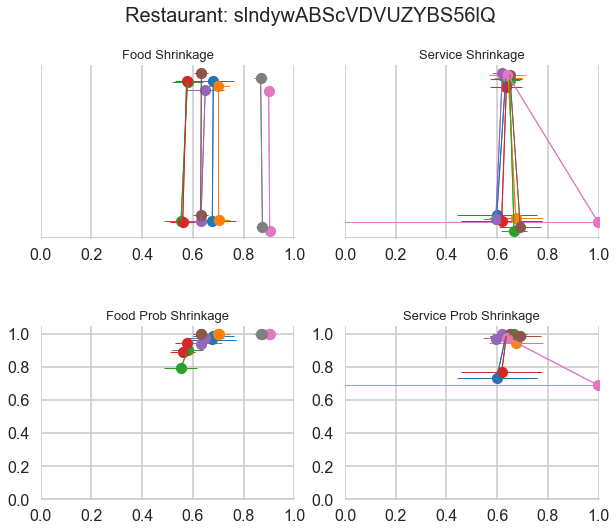

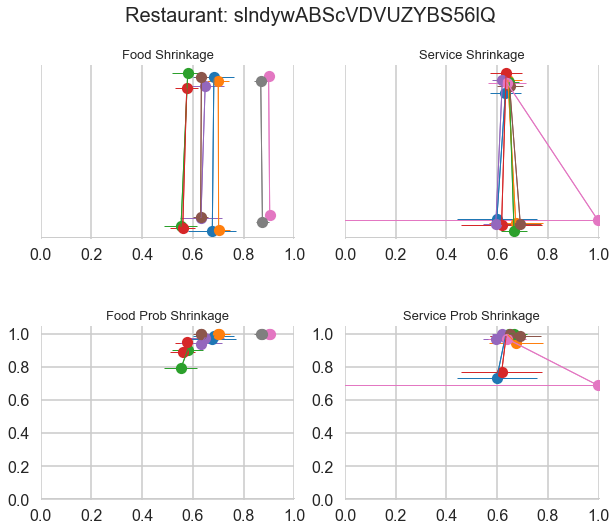

In [30]:
for i in range(len(rest_ids)):
    #plt.figure()
    fig,ax = plt.subplots(2,2,figsize=(10,8))
    fig.subplots_adjust(hspace=.5)
    plt.suptitle('Restaurant: ' + str(rest_ids[i]),fontsize=20)
    #title('Restaurant: '+str(rest_ids[i]))
    #food
    shrinkage_plot(collector[i][1],np.mean(collector[i][0]['theta'],axis=0),varcollector[i][0],np.var(collector[i][0]['theta'],axis=0),varcollector[i][1],ax[0,0])
    ax[0,0].set_title('Food Shrinkage',fontsize=13)
    #service
    shrinkage_plot(collector[i][3],np.mean(collector[i][2]['theta'],axis=0),varcollector[i][2],np.var(collector[i][2]['theta'],axis=0),varcollector[i][3],ax[0,1])
    ax[0,1].set_title('Service Shrinkage',fontsize=13)
    
    #food
    prob_shrinkage_plot(collector[i][1],np.mean(collector[i][0]['theta'],axis=0),varcollector[i][0],np.var(collector[i][0]['theta'],axis=0),varcollector[i][1],ax[1,0])
    ax[1,0].set_title('Food Prob Shrinkage',fontsize=13)
    
    #service
    prob_shrinkage_plot(collector[i][3],np.mean(collector[i][2]['theta'],axis=0),varcollector[i][2],np.var(collector[i][2]['theta'],axis=0),varcollector[i][3],ax[1,1])
    ax[1,1].set_title('Service Prob Shrinkage',fontsize=13)
    
    

#### Part C

In this part I take the mean of the posterior means for each respective class, food and service. The problem with doing so leads to numerous issues such as:
1. Some restaurants might have very few reviews while others have many reviews. In essence, our means of the posterior predictives will have more variance when we have fewer reviews.
2. Some restaurants might have reviews by reviewers who are particularly biased e.g. restaurant A could be reviewed by 2 people who both have a propensity to rate restaurants poorly.
3. We are really dealing with the posterior which is one of our parameters, not y* samples. Even though we are dealing with Normal models we should really be looking at posterior predictives.

In [31]:
ranks = pd.DataFrame(columns=['food(avg)','service(avg)','food(var)','service(var)'])
for i in range(len(rest_ids)):
    foodtheta = np.mean(collector[i][0]['theta'],axis=0)
    servicetheta = np.mean(collector[i][2]['theta'],axis=0)
    foodmean = np.mean(foodtheta)
    servicemean = np.mean(servicetheta)
    foodvar = np.var(foodtheta)
    servicevar = np.var(servicetheta)
    ranks.loc[len(ranks)] = [foodmean,servicemean,foodvar,servicevar]
    

In [32]:
ranks.sort_values(by='food(avg)')

,food(avg),service(avg),food(var),service(var)
3,0.485952,0.594596,0.002653,0.000105
0,0.588359,0.679118,0.000342,0.000292
2,0.657685,0.677318,0.004803,0.000227
1,0.693705,0.698645,0.002490,0.005332
4,0.698122,0.638939,0.013139,0.000088
5,0.698467,0.637798,0.013096,0.000083


In [33]:
ranks.sort_values(by='service(avg)')

,food(avg),service(avg),food(var),service(var)
3,0.485952,0.594596,0.002653,0.000105
5,0.698467,0.637798,0.013096,0.000083
4,0.698122,0.638939,0.013139,0.000088
2,0.657685,0.677318,0.004803,0.000227
0,0.588359,0.679118,0.000342,0.000292
1,0.693705,0.698645,0.002490,0.005332


#### Extra Credit

One thing we can use is the sample ppc to get posterior predictive samples and weight the posterior predictions by the difference between the users average rating and the rating they gave this particular restaurant. (Doing so helps normalize out some of the problems associated with biased reviewers). We can then take the mean of these and see what happens to our overall scores!

#### Equal Weighting

In [37]:
newranks = pd.DataFrame(columns=['food(avg)','service(avg)','food(var)','service(var)'])
for i in range(len(rest_ids)):
    foodtheta = np.mean(ppcs[i][0]['obs'],axis=0)
    servicetheta = np.mean(ppcs[i][1]['obs'],axis=0)
    foodmean = np.mean(foodtheta)
    servicemean = np.mean(servicetheta)
    foodvar = np.var(foodtheta)
    servicevar = np.var(servicetheta)
    newranks.loc[len(newranks)] = [foodmean,servicemean,foodvar,servicevar]
    

In [38]:
newranks.sort_values(by='food(avg)')

,food(avg),service(avg),food(var),service(var)
3,0.523267,0.574849,0.003941,0.001077
0,0.600461,0.695781,0.001172,0.000595
2,0.658370,0.670233,0.004661,0.000598
1,0.690774,0.687434,0.002519,0.006044
5,0.696981,0.639986,0.013151,0.000137
4,0.698282,0.630174,0.012867,0.000438


In [39]:
newranks.sort_values(by='service(avg)')

,food(avg),service(avg),food(var),service(var)
3,0.523267,0.574849,0.003941,0.001077
4,0.698282,0.630174,0.012867,0.000438
5,0.696981,0.639986,0.013151,0.000137
2,0.658370,0.670233,0.004661,0.000598
1,0.690774,0.687434,0.002519,0.006044
0,0.600461,0.695781,0.001172,0.000595


We can see that the posterior predictive gives us different set of means (magnitude). Furthermore, when we rank by service we can see a difference in the ranking.

#### Varied Weighting

In [76]:
newranks_var = pd.DataFrame(columns=['food(avg)','service(avg)','food(var)','service(var)'])
for i in range(len(rest_ids)):
    foodtheta = np.mean(ppcs[i][0]['obs'],axis=0)
    servicetheta = np.mean(ppcs[i][1]['obs'],axis=0)
    #add +1 to make avg-user = 1 so unity weighting for avg 
    foodws = np.abs(staravg[i][0]-stars[i][0]) + 1
    servws = np.abs(staravg[i][1]-stars[i][1]) + 1
    foodmean = np.sum(foodtheta*foodws)/foodws.sum()
    servicemean = np.sum(servicetheta*servws)/servws.sum()
    foodvar = np.var(foodtheta)
    servicevar = np.var(servicetheta)
    newranks_var.loc[len(newranks_var)] = [foodmean,servicemean,foodvar,servicevar]
    

In [77]:
newranks_var.sort_values(by='food(avg)')

,food(avg),service(avg),food(var),service(var)
3,0.519405,0.573003,0.003941,0.001077
0,0.603691,0.698557,0.001172,0.000595
2,0.645490,0.672969,0.004661,0.000598
1,0.692227,0.712459,0.002519,0.006044
5,0.693199,0.640217,0.013151,0.000137
4,0.694688,0.630376,0.012867,0.000438


In [78]:
newranks_var.sort_values(by='service(avg)')

,food(avg),service(avg),food(var),service(var)
3,0.519405,0.573003,0.003941,0.001077
4,0.694688,0.630376,0.012867,0.000438
5,0.693199,0.640217,0.013151,0.000137
2,0.645490,0.672969,0.004661,0.000598
0,0.603691,0.698557,0.001172,0.000595
1,0.692227,0.712459,0.002519,0.006044


We only have a few examples here because of computational cost. But, we do see that with service, ranking in this new way makes restaurant 1 in our case the highest rank, while restaurant 0 the highest rank with equal weighting. Furthermore, we can see the weighting really does change our probabilities significantly.